# Tweets sentiment analysis

### Importing the libraries

In [1]:
import random
from numpy.random import seed
import tensorflow as tf
import time
SEED = 32
SEED = int(time.time())
random.seed(SEED)
seed(SEED)
tf.random.set_seed(SEED)

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
import os
#os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [3]:
import random
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D, GaussianNoise
from tensorflow.keras.layers import BatchNormalization as BN
from tensorflow.keras.layers import GaussianNoise as GN
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import LearningRateScheduler as LRS
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold

#MANAGEMENT PURPOSES ONLY-
from tqdm.notebook import tqdm
import gc
gc.collect()

0

### Load data

In [4]:
data_filepath = 'data'
images_filenames = [x[2] for x in os.walk(os.path.join(data_filepath, 'profile_matrices_word2vec'))][0]

images_filenames_test_nolabel = [x[2] for x in os.walk(os.path.join(data_filepath, 'profile_matrices_word2vec_test_nolabel'))][0]

In [5]:
X = []
for i in range(len(images_filenames)):
    X.append(np.load(os.path.join(data_filepath, 'profile_matrices_word2vec', str(i)+'.npy')))

X_TEST_NO_LABEL = []
for i in range(len(images_filenames_test_nolabel)):
    X_TEST_NO_LABEL.append(np.load(os.path.join(data_filepath, 'profile_matrices_word2vec_test_nolabel', str(i)+'.npy')))


In [6]:
y = np.load('./data/y.npy')

In [7]:
X[0].shape

(200, 200)

In [8]:
X_TEST_NO_LABEL[0].shape

(200, 200)

In [9]:
len(X)

420

In [10]:
len(X_TEST_NO_LABEL)

180

In [11]:
len(y)

420

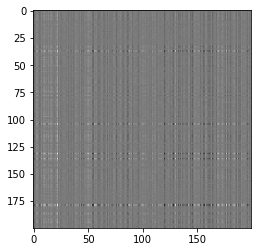

In [12]:
plt.imshow(X[0], cmap='gray')

In [13]:
X[0].shape

(200, 200)

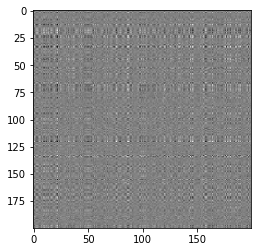

In [14]:
plt.imshow(X_TEST_NO_LABEL[0]-X_TEST_NO_LABEL[1], cmap='gray')

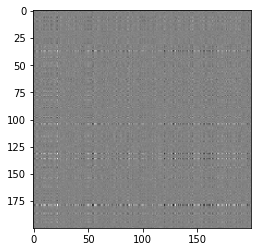

In [15]:
plt.imshow(X[0]-X[1], cmap='gray')

In [16]:
#plt.imshow(resize_image((X[0]-X[326])[0], desired_size=20)[0], cmap='gray')

In [17]:
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
min_lr = 1e-9
EPOCHS = 100

In [18]:
optimiser = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9)
num_classes = 2

In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=min_lr)

In [20]:
def build_model(input_shape):
    model = Sequential()
    
    model.add(Dense(1024, input_dim=input_shape, activation='relu'))
    
    model.add(Dense(1024))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))

    model.add(Dense(1024))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))

    model.add(Dense(1024))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    
    model.add(Dense(512))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    
    model.add(Dense(512))
    model.add(BN())
    model.add(GN(0.3))
    model.add(Activation('relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer=optimiser,
              metrics=['accuracy'])
    model.summary()
        
    return model

In [21]:
X = np.mean(X, axis=1)
X_TEST_NO_LABEL = np.mean(X_TEST_NO_LABEL, axis=1)
y = to_categorical(y, num_classes=num_classes)


In [22]:
X.shape

(420, 200)

In [23]:
X_TEST_NO_LABEL.shape

(180, 200)

In [24]:
y.shape

(420, 2)

In [25]:
model = build_model(X.shape[1])

checkpoint = ModelCheckpoint('best_model.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')


history=model.fit(X, y,
                  steps_per_epoch=len(X) / BATCH_SIZE, 
                  epochs=EPOCHS,
                  callbacks=[reduce_lr, checkpoint],
                  verbose=1)

## TEST
scores = model.evaluate(X, y, verbose=1)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              205824    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
gaussian_noise (GaussianNois (None, 1024)              0         
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
______________________________________________

2022-05-18 18:32:29.693063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-18 18:32:29.693181: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-18 18:32:30.002224: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-18 18:32:30.002405: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-05-18 18:32:30.297857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 38ms/step - loss: 0.6342 - accuracy: 0.6548

Epoch 00001: loss improved from inf to 0.63424, saving model to best_model.h5
Epoch 2/100
13/13 [==============================] - 0s 31ms/step - loss: 0.4957 - accuracy: 0.7690

Epoch 00002: loss improved from 0.63424 to 0.49567, saving model to best_model.h5
Epoch 3/100
13/13 [==============================] - 0s 31ms/step - loss: 0.3844 - accuracy: 0.8262

Epoch 00003: loss improved from 0.49567 to 0.38443, saving model to best_model.h5
Epoch 4/100
13/13 [==============================] - 0s 31ms/step - loss: 0.3940 - accuracy: 0.8286

Epoch 00004: loss did not improve from 0.38443
Epoch 5/100
13/13 [==============================] - 0s 31ms/step - loss: 0.4163 - accuracy: 0.8262

Epoch 00005: loss did not improve from 0.38443
Epoch 6/100
13/13 [==============================] - 0s 31ms/step - loss: 0.3641 - accuracy: 0.8452

Epoch 00006: loss improved from 0.38443 to 0.36406, saving model to be

2022-05-18 18:33:13.524956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [26]:
yhat = model.predict(X_TEST_NO_LABEL)

2022-05-18 18:36:30.193292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [28]:
yhat = np.argmax(yhat, axis=1)

In [29]:
yhat

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1])

In [31]:
user_indices = {}

with open('./data/user_indices_TEST_NO_LABEL.txt', 'r') as f:
    for line in f:
        i, user = line.split("\t")
        user_indices[int(i)]=user.strip()

In [33]:
with open('./TEST_PREDICTS.txt', 'w') as f:
    for i in range(len(yhat)):
        f.write(user_indices[i] + "\t" + str(yhat[i]) + "\n")